<a href="https://colab.research.google.com/github/tom-cruz/RiskifiedAssessment/blob/master/RiskifiedAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Riskified Coding Exercise
*Exploring a dataset made up of records of shapes with their colors and areas*

## Library Import


In [ ]:
# Import libraries used throughout analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi, sqrt

## Data Import

In [ ]:
# Assign URL source and file name to variables
website = "https://raw.github.com/tom-cruz/RiskifiedAssessment/master/Analyst_Coding_Test.csv"

In [ ]:
# Grab file from website
shapes_df = pd.read_csv(website)

In [ ]:
# Preview DataFrame
shapes_df.head()

,shape,color,area
0,square,yellow,9409.0
1,circle,yellow,4071.5
2,triangle,blue,2028.0
3,square,blue,3025.0
4,square,blue,9216.0


In [ ]:
# Verify all records and data types are imported correctly
shapes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   shape   1000 non-null   object 
 1   color   1000 non-null   object 
 2   area    1000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


## Exploratory Data Analysis

**1. Draw a boxplot showing the area size distribution for each shape.**

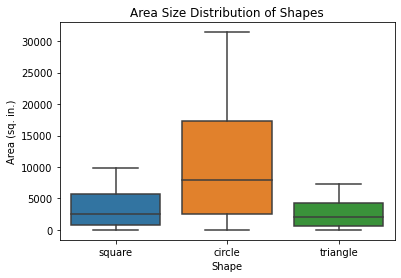

In [ ]:
# Create boxplot shape v. area
ax1 = sns.boxplot(x='shape',y='area',data=shapes_df)
ax1.set(xlabel='Shape',ylabel='Area (sq. in.)')
plt.title('Area Size Distribution of Shapes')

# Display Plot
plt.show(ax1)

**2. Calculate the mean, max, and standard deviation of the area size of each color.**

In [ ]:
# Calculate Summary Statistics of Dataframe by Color
sumStat_color = shapes_df.groupby('color').describe()

# View Transformed DataFrame
sumStat_color

area                            ...                           
        count         mean          std  ...     50%       75%      max
color                                    ...                           
blue    360.0  3208.131667  3039.212965  ...  2500.0  5301.250  21642.4
green    78.0  5761.119231  6695.029606  ...  3844.0  7396.000  27759.1
red     290.0  3815.871034  5092.678377  ...  2436.8  5012.450  31415.9
yellow  272.0  4538.208088  5352.460578  ...  2818.2  6271.175  31415.9

[4 rows x 8 columns]

**3. What is the average area size of a yellow square?**

In [ ]:
# Calculate Summary Statistics of Dataframe by Shape and Color
sumStat_shape_color = shapes_df.groupby(['shape','color']).describe()

# View Transformed DataFrame
sumStat_shape_color

area                ...                    
                 count          mean  ...        75%      max
shape    color                        ...                    
circle   blue      9.0   8740.600000  ...  13273.200  21642.4
         green    31.0  10489.977419  ...  16972.450  27759.1
         red      30.0  12871.420000  ...  22968.175  31415.9
         yellow   50.0   9888.412000  ...  17212.825  31415.9
square   blue    152.0   3857.993421  ...   6440.250   9801.0
         green    47.0   2642.085106  ...   4226.000   9025.0
         red      56.0   3154.017857  ...   5551.000   9801.0
         yellow  222.0   3333.207207  ...   5439.250   9801.0
triangle blue    199.0   2461.542714  ...   4107.000   7350.8
         red     204.0   2665.857843  ...   4332.000   7350.8

[10 rows x 8 columns]

*According to the table above, the average size of a yellow square is **3333.207 $ in^2$**.*

**4. Which shape is most likely to be green?**

In [ ]:
# Calculate Shapes by Color Percent of Total
sumStat_shape_color[('area','Percent_Total')] = sumStat_shape_color[('area','count')]/sumStat_shape_color[('area','count')].agg('sum')*100

# View Transformed DataFrame
sumStat_shape_color

area                ...                       
                 count          mean  ...      max Percent_Total
shape    color                        ...                       
circle   blue      9.0   8740.600000  ...  21642.4           0.9
         green    31.0  10489.977419  ...  27759.1           3.1
         red      30.0  12871.420000  ...  31415.9           3.0
         yellow   50.0   9888.412000  ...  31415.9           5.0
square   blue    152.0   3857.993421  ...   9801.0          15.2
         green    47.0   2642.085106  ...   9025.0           4.7
         red      56.0   3154.017857  ...   9801.0           5.6
         yellow  222.0   3333.207207  ...   9801.0          22.2
triangle blue    199.0   2461.542714  ...   7350.8          19.9
         red     204.0   2665.857843  ...   7350.8          20.4

[10 rows x 9 columns]

*According to the calculations above, the shape that is most likely to be green is a **square**, with a liklihood of 4.7%.*

**5. Given the fact that the object is red, with an area size larger than 3,000 - what are the chances the object is a square? a triangle? a circle?**

In [ ]:
# Calculate Summary Statistics of Dataframe by Shape and Color - Filtered to include red objects with area larger than 3000
sumStat_redShape = shapes_df[(shapes_df['color'] == 'red') & (shapes_df['area'] > 3000)].groupby(['shape','color']).describe()

# Calculate Red Shapes with Area larger than 3000 sq. in. Percent of Total
sumStat_redShape[('area','Percent_Total')] = sumStat_redShape[('area','count')]/sumStat_redShape[('area','count')].agg('sum')*100

# View Transformed DataFrame
sumStat_redShape

area                ...                       
               count          mean  ...      max Percent_Total
shape    color                      ...                       
circle   red    20.0  18604.670000  ...  31415.9          16.0
square   red    21.0   6666.142857  ...   9801.0          16.8
triangle red    84.0   4875.502381  ...   7350.8          67.2

[3 rows x 9 columns]

*According to the calculations above, the liklihood for a red circle, square, and triangle, each with an area size greater than 3000, is 16%, 16.8%, and 67.2%, respectively.*

**6. Write a function that calculates the side or radius of an object, depending on the shape and area of the object.**

In [ ]:
def calcSide(shape,area):
  """Calculates the side, or radius, of an object, depending on the shape and area of the object.
  Note: Assumes triangluar shapes are equilateral."""
  
  # Error Handling for Area
  if (type(area) is not float) and (type(area) is not int):
    raise TypeError("Invalid data type for area. Must be of type int or float.")

  # Calculate side dependent on shape
  if shape == 'circle':
      # area = pi*r**2
      side = sqrt(area/pi)
  elif shape == 'square':
      # area = side**2
      side = sqrt(area)
  elif shape == 'triangle':
      # area = sqrt(3)/4*side**2
      side = sqrt(4*area/sqrt(3))
  else:
    raise ValueError("Shape is not currently supported in side calculation. Supported shapes: 'circle','square','triangle'.")
  
  return side

**7. Add a column to the dataset called "side" that shows the size matching the area in each row, round that number to the closest integer (shape side or radius).**

In [ ]:
# Add 'side' field to DataFrame
shapes_df['side'] = shapes_df.apply(lambda row: calcSide(row['shape'],row['area']), axis=1).round(0).astype('int')

# Preview DataFrame with new column
shapes_df.head()

,shape,color,area,side
0,square,yellow,9409.0,97
1,circle,yellow,4071.5,36
2,triangle,blue,2028.0,68
3,square,blue,3025.0,55
4,square,blue,9216.0,96


**8. Draw a boxplot showing the side size distribution for each shape - what can you infer from this plot?**

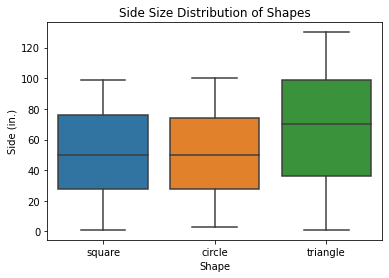

In [ ]:
# Create boxplot shape v. side
ax2 = sns.boxplot(x='shape',y='side',data=shapes_df)
ax2.set(xlabel='Shape',ylabel='Side (in.)')
plt.title('Side Size Distribution of Shapes')

# Display Plot
plt.show(ax2)

*At first glance, what we can infer from the side size distribution is that the circles and squares have almost identical distributions in this dataset. The side size distribution of triangles has a wider range of sizes and, on average, has a larger side size.*

*It is important to distinguish that the side of a square is equated to the radius of a circle for the side attribute. While their side size distributions may be very similar, they give completely different shape sizes, due to the nature of their geometry. This boxplot of the shapes' side sizes is not enough to infer much information about the shape itself.*

**9. Make a scatter plot with "side" on the x axis, "area" on the y axis with a different color for each shape.**

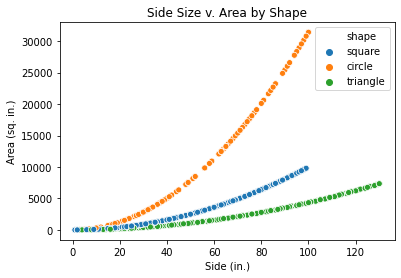

In [ ]:
# Create scatter plot side v. area for each shape
ax3 = sns.scatterplot(x='side',y='area',data=shapes_df,hue='shape')
ax3.set(xlabel='Side (in.)',ylabel='Area (sq. in.)')
plt.title('Side Size v. Area by Shape')

# Display Plot
plt.show(ax3)

*Now that we're analyzing the relationship between side size and area for each shape, we can quickly see how the side size impacts the overall area across the three shapes.*

**10. Create a dataframe, table or list that show for each shape:**

    a. The proportion of red objects within the shape

    b. The proportion of blue area out of the shape's total area (sum of square inch blue area of the shape over sum of all shape size).

In [ ]:
# Calculate Shapes by Color count
count = shapes_df[['shape','color','area']].groupby(['shape','color']).agg('count')
# Rename area column to count
count.columns = ['count']

# Calculate Shapes by Color proportion
colorProportion = count.groupby(['shape']).apply(lambda x: x/x.sum()).round(2)
# Rename area column to proportion
colorProportion.columns = ['proportion']

# Merge count and proportion objects
redShapeProp = count.merge(colorProportion,how='left',on=['shape','color']).reset_index()

# Filter DataFrame for red shapes
redShapeProp[redShapeProp['color']=='red'].set_index('shape')

,color,count,proportion
shape,,,
circle,red,30,0.25
square,red,56,0.12
triangle,red,204,0.51


In [ ]:
# Calculate Shapes by area sum
totalArea = shapes_df[['shape','color','area']].groupby(['shape','color']).agg('sum')
# Rename area column to count
totalArea.columns = ['total']

# Calculate Shapes by Color proportion
areaProportion = totalArea.groupby(['shape']).apply(lambda x: x/x.sum()).round(2)
# Rename area column to proportion
areaProportion.columns = ['proportion']

# Merge count and proportion objects
blueAreaProp = totalArea.merge(areaProportion,how='left',on=['shape','color']).reset_index()

# Filter DataFrame for red shapes
blueAreaProp[blueAreaProp['color']=='blue'].set_index('shape')

,color,total,proportion
shape,,,
circle,blue,78665.4,0.06
square,blue,586415.0,0.36
triangle,blue,489847.0,0.47


**11. Create a function that calculates 10. b. for a given shape and color.**

In [ ]:
def shapeAreaProportion(shape, color, df):
  """Calculates the proportion of a shape's area based on its color"""
  
  # Error Handling
  if not isinstance(df, pd.DataFrame):
    raise TypeError("Object is not a DataFrame.")
  
  # Unique values of shapes and colors in DataFrame
  shapes = df['shape'].unique()
  colors = df['color'][df['shape'] == shape].unique()

  # Error Handling
  if shape not in shapes:
    raise ValueError("Shape not found in DataFrame. Supported shapes: ",shapes)
  if color not in colors:
    raise ValueError("Color not found in DataFrame. Supported colors for a ",shape," : ",colors)
  
  # Calculate Shapes by area sum
  totArea = df[['shape','color','area']].groupby(['shape','color']).agg('sum')
  # Rename area column to count
  totArea.columns = ['total']

  # Calculate Shapes by Color proportion
  areaProp = totArea.groupby(['shape']).apply(lambda x: x/x.sum()).round(2)
  # Rename area column to proportion
  areaProp.columns = ['proportion']

  # Merge count and proportion objects
  areaProp = totArea.merge(areaProp,how='left',on=['shape','color'])

  # Filter DataFrame for red shapes
  return areaProp.loc[shape,color]['proportion']

In [ ]:
# Example
shapeAreaProportion('circle','blue',shapes_df)

0.06